# Problem Statement:

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
# loading data
book_data = pd.read_csv('book.csv')

# Data Exploration

In [4]:
book_data.shape

(2000, 11)

In [5]:
book_data.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [6]:
book_data.tail()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
1995         1          0        1         1  
1996         0          0        0         0  
1997         0          0        0         0  
1998         0          0        0         0  
1999         0          0        0         0

In [7]:
book_data.sample(5)

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
1521         0         0        0         0       0       0        0   
1142         0         0        0         0       0       0        0   
629          1         1        1         0       1       0        1   
1556         1         0        0         0       0       0        1   
50           1         0        1         1       0       1        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
1521         0          0        0         0  
1142         0          0        0         1  
629          0          0        0         0  
1556         0          0        0         0  
50           0          0        0         0

### Quick Data Check

In [8]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


### Statistical summary

In [9]:
book_data.describe().T

count    mean       std  min  25%  50%  75%  max
ChildBks   2000.0  0.4230  0.494159  0.0  0.0  0.0  1.0  1.0
YouthBks   2000.0  0.2475  0.431668  0.0  0.0  0.0  0.0  1.0
CookBks    2000.0  0.4310  0.495340  0.0  0.0  0.0  1.0  1.0
DoItYBks   2000.0  0.2820  0.450086  0.0  0.0  0.0  1.0  1.0
RefBks     2000.0  0.2145  0.410578  0.0  0.0  0.0  0.0  1.0
ArtBks     2000.0  0.2410  0.427797  0.0  0.0  0.0  0.0  1.0
GeogBks    2000.0  0.2760  0.447129  0.0  0.0  0.0  1.0  1.0
ItalCook   2000.0  0.1135  0.317282  0.0  0.0  0.0  0.0  1.0
ItalAtlas  2000.0  0.0370  0.188809  0.0  0.0  0.0  0.0  1.0
ItalArt    2000.0  0.0485  0.214874  0.0  0.0  0.0  0.0  1.0
Florence   2000.0  0.1085  0.311089  0.0  0.0  0.0  0.0  1.0

# Data Preprocessing

### Identifying Missing Values

In [10]:
book_data.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

- There is no missing values in dataset

In [11]:
count = book_data.sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

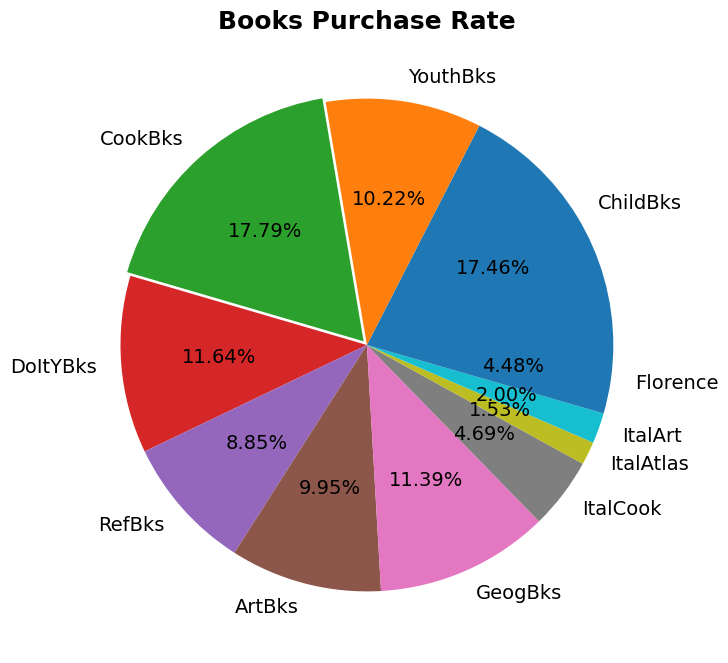

In [12]:
plt.figure(figsize = (8,8))
plt.pie(book_data.sum(), labels= book_data.columns,
       explode = [0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%', textprops = {'size': 14})

plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()


In [13]:
count.sort_values(axis=0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

items  count
0     CookBks    862
1    ChildBks    846
2    DoItYBks    564
3     GeogBks    552
4    YouthBks    495
5      ArtBks    482
6      RefBks    429
7    ItalCook    227
8    Florence    217
9     ItalArt     97
10  ItalAtlas     74

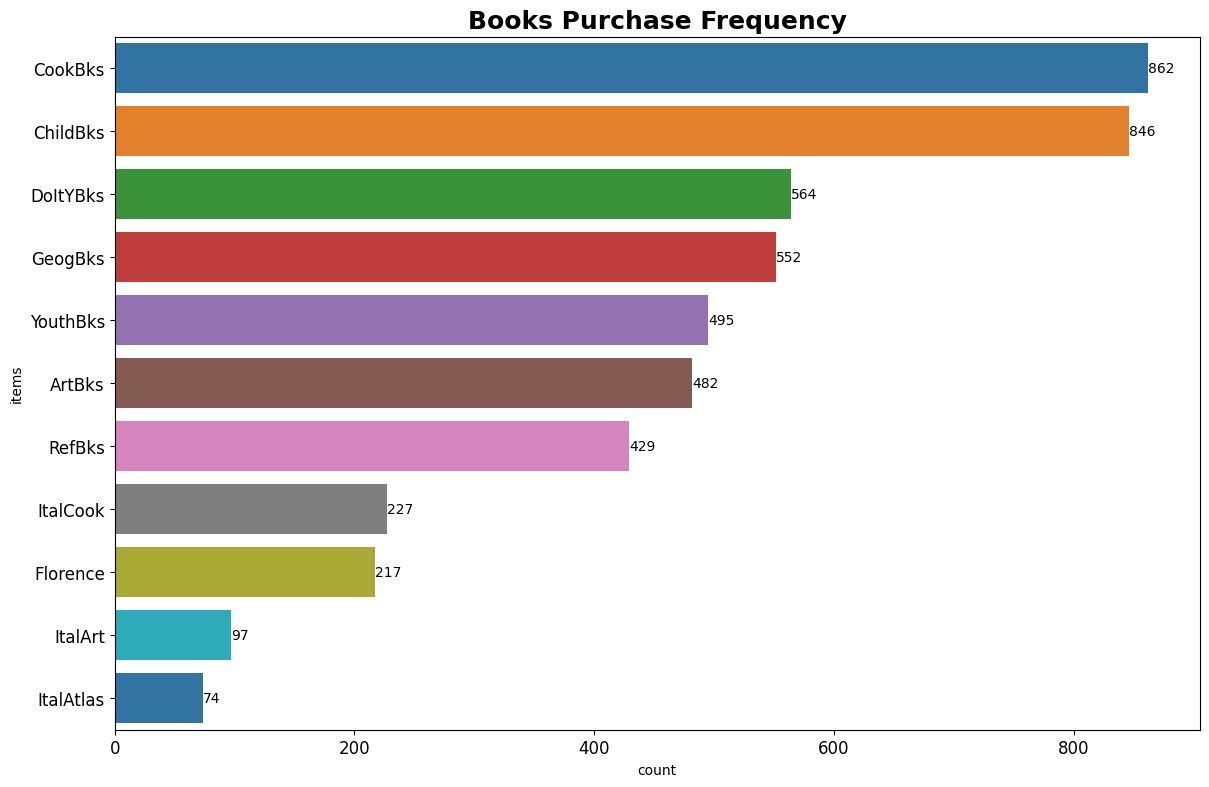

In [14]:
plt.figure(figsize = (14,9))
ax = sns.barplot(x = 'count', y = 'items', data= count, hue='items',palette='tab10')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Books Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

- Most Frequent Bought Books are : Cooking books and Child books

In [17]:
# first = pd.DataFrame(book_data.sum() / book_data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
# first

In [16]:
item_sets = {}

In [16]:
te = TransactionEncoder()

In [17]:
te_ary = te.fit(book_data).transform(book_data)

In [18]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

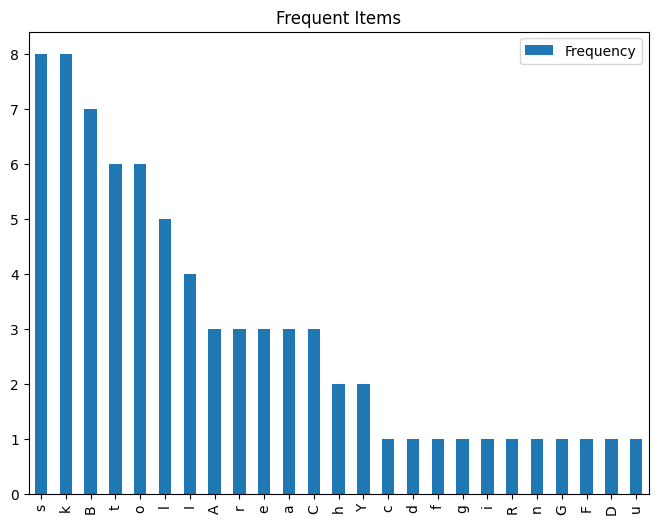

In [19]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar', figsize=(8,6), title="Frequent Items")
plt.show()

# Apriori algorithm

In [20]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [21]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [22]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(book_data,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [23]:
confs = []

In [24]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types re

C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types re

In [25]:
all_conf = pd.concat(confs,axis=1)

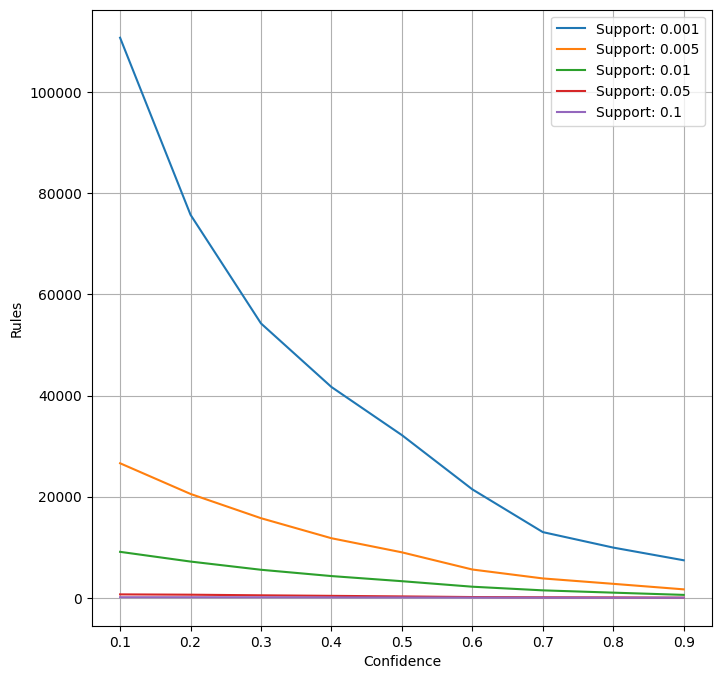

In [26]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# Conclusion

As shown in above graph

1. Lower the Confidence level Higher the no. of rules.
2. Higher the Support, lower the no. of rules.

### Lets try with Support 0.01 and Confidence at 0.4

In [27]:
ap_final =  apriori(ap,0.001,True)

In [28]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [29]:
rules_final[rules_final['confidence'] > 0.5]

antecedents      consequents  antecedent support  consequent support  \
0           (A)              (I)              0.0015              0.0020   
2           (A)              (a)              0.0015              0.0015   
3           (a)              (A)              0.0015              0.0015   
4           (A)              (l)              0.0015              0.0025   
6           (A)              (r)              0.0015              0.0015   
..          ...              ...                 ...                 ...   
742      (k, Y)     (o, t, s, B)              0.0010              0.0010   
744      (Y, t)     (k, o, s, B)              0.0010              0.0020   
745      (t, o)     (k, s, Y, B)              0.0015              0.0010   
746      (Y, o)     (k, t, s, B)              0.0010              0.0015   
747         (Y)  (s, B, k, t, o)              0.0010              0.0010   

     support  confidence         lift  leverage  conviction  zhangs_metric  
0      0.001    0.666667   333.333333  0.000997      2.9940       0.998498  
2      0.001    0.666667   444.444444  0.000998      2.9955       0.999249  
3      0.001    0.666667   444.444444  0.000998      2.9955       0.999249  
4      0.001    0.666667   266.666667  0.000996      2.9925       0.997747  
6      0.001    0.666667   444.444444  0.000998      2.9955       0.999249  
..       ...         ...          ...       ...         ...            ...  
742    0.001    1.000000  1000.000000  0.000999         inf       1.000000  
744    0.001    1.000000   500.000000  0.000998         inf       0.998999  
745    0.001    0.666667   666.666667  0.000999      2.9970       1.000000  
746    0.001    1.000000   666.666667  0.000999         inf       0.999499  
747    0.001    1.000000  1000.000000  0.000999         inf       1.000000  

[588 rows x 10 columns]

In [30]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

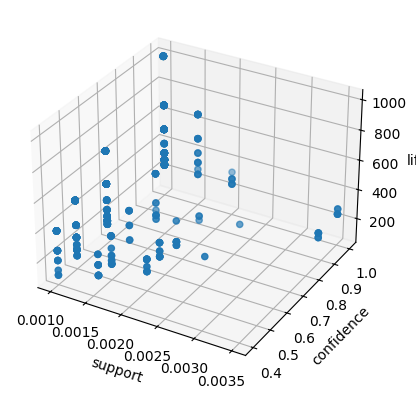

In [31]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

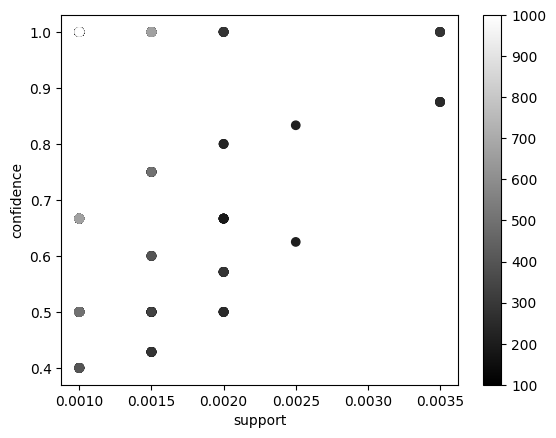

In [32]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

#  Association Rules

### Association rules with 10% Support and 30% confidence

In [33]:
frequent_itemsets1 = apriori(book_data, min_support= 0.1, use_colnames= True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                       itemsets  length
0    0.4230                     (ChildBks)       1
1    0.2475                     (YouthBks)       1
2    0.4310                      (CookBks)       1
3    0.2820                     (DoItYBks)       1
4    0.2145                       (RefBks)       1
5    0.2410                       (ArtBks)       1
6    0.2760                      (GeogBks)       1
7    0.1135                     (ItalCook)       1
8    0.1085                     (Florence)       1
9    0.1650           (ChildBks, YouthBks)       2
10   0.2560            (ChildBks, CookBks)       2
11   0.1840           (ChildBks, DoItYBks)       2
12   0.1515             (ChildBks, RefBks)       2
13   0.1625             (ChildBks, ArtBks)       2
14   0.1950            (ChildBks, GeogBks)       2
15   0.1620            (CookBks, YouthBks)       2
16   0.1155           (YouthBks, DoItYBks)       2
17   0.1010             (ArtBks, YouthBks)       2
18   0.1205            (YouthBks, GeogBks)       2
19   0.1875            (CookBks, DoItYBks)       2
20   0.1525              (CookBks, RefBks)       2
21   0.1670              (CookBks, ArtBks)       2
22   0.1925             (CookBks, GeogBks)       2
23   0.1135            (CookBks, ItalCook)       2
24   0.1055             (DoItYBks, RefBks)       2
25   0.1235             (ArtBks, DoItYBks)       2
26   0.1325            (DoItYBks, GeogBks)       2
27   0.1105              (GeogBks, RefBks)       2
28   0.1275              (ArtBks, GeogBks)       2
29   0.1290  (ChildBks, YouthBks, CookBks)       3
30   0.1460  (ChildBks, DoItYBks, CookBks)       3
31   0.1225    (ChildBks, CookBks, RefBks)       3
32   0.1265    (ChildBks, CookBks, ArtBks)       3
33   0.1495   (ChildBks, CookBks, GeogBks)       3
34   0.1045  (ChildBks, DoItYBks, GeogBks)       3
35   0.1020    (ChildBks, GeogBks, ArtBks)       3
36   0.1015    (CookBks, DoItYBks, ArtBks)       3
37   0.1085   (CookBks, DoItYBks, GeogBks)       3
38   0.1035     (CookBks, GeogBks, ArtBks)       3

#### Support value gives us these information:

Head 5
- 42 percent of 100 purchases are ChildBks
- 24 percent of 100 purchases are YouthBks
- 43 percent of 100 purchases are CookBks
- 28 percent of 100 purchases are DoltYBks
- 21 percent of 100 purchases are RefBks

Tail 5
- 10 percent of 100 purchases are ChildBks, GeogBks, DoItYBks
- 10 percent of 100 purchases are ChildBks, GeogBks, ArtBks
- 10 percent of 100 purchases are ArtBks, CookBks, DoItYBks
- 10 percent of 100 purchases are GeogBks, CookBks, DoItYBks
- 10 percent of 100 purchases are GeogBks, ArtBks, CookBks

### With 30% Confidence

In [34]:
rules1 = association_rules(frequent_itemsets1, metric='confidence', min_threshold= 0.3)
rules1

antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
84  (CookBks, GeogBks)            (ArtBks)              0.1925   
85   (CookBks, ArtBks)           (GeogBks)              0.1670   
86   (ArtBks, GeogBks)           (CookBks)              0.1275   
87           (GeogBks)   (CookBks, ArtBks)              0.2760   
88            (ArtBks)  (CookBks, GeogBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
1               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
4               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770   
..                 ...      ...         ...       ...       ...         ...   
84              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
85              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063   
86              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812   
87              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800   
88              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   

    zhangs_metric  
0        0.633449  
1        0.485714  
2        0.498856  
3        0.505870  
4        0.609543  
..            ...  
84       0.683298  
85       0.665866  
86       0.537602  
87       0.766114  
88       0.726961  

[89 rows x 10 columns]

- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [35]:
rules1.sort_values('lift', ascending=False)

antecedents          consequents  antecedent support  \
28           (ItalCook)            (CookBks)              0.1135   
70   (ChildBks, ArtBks)            (GeogBks)              0.1625   
72            (GeogBks)   (ChildBks, ArtBks)              0.2760   
78             (ArtBks)  (CookBks, DoItYBks)              0.2410   
74  (CookBks, DoItYBks)             (ArtBks)              0.1875   
..                  ...                  ...                 ...   
5            (DoItYBks)           (ChildBks)              0.2820   
12            (CookBks)           (YouthBks)              0.4310   
13           (YouthBks)            (CookBks)              0.2475   
3             (CookBks)           (ChildBks)              0.4310   
2            (ChildBks)            (CookBks)              0.4230   

    consequent support  support  confidence      lift  leverage  conviction  \
28              0.4310   0.1135    1.000000  2.320186  0.064582         inf   
70              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628   
72              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448   
78              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674   
74              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797   
..                 ...      ...         ...       ...       ...         ...   
5               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347   
12              0.2475   0.1620    0.375870  1.518667  0.055328    1.205678   
13              0.4310   0.1620    0.654545  1.518667  0.055328    1.647105   
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   

    zhangs_metric  
28       0.641850  
70       0.669008  
72       0.773887  
78       0.730966  
74       0.682834  
..            ...  
5        0.489842  
12       0.600225  
13       0.453858  
3        0.505870  
2        0.498856  

[89 rows x 10 columns]

### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [36]:
lift1 = rules1[rules1.lift>1]
lift1

antecedents         consequents  antecedent support  \
0           (ChildBks)          (YouthBks)              0.4230   
1           (YouthBks)          (ChildBks)              0.2475   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
84  (CookBks, GeogBks)            (ArtBks)              0.1925   
85   (CookBks, ArtBks)           (GeogBks)              0.1670   
86   (ArtBks, GeogBks)           (CookBks)              0.1275   
87           (GeogBks)   (CookBks, ArtBks)              0.2760   
88            (ArtBks)  (CookBks, GeogBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750   
1               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000   
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240   
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069   
4               0.2820   0.1840    0.434988  1.542511  0.064714    1.270770   
..                 ...      ...         ...       ...       ...         ...   
84              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657   
85              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063   
86              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812   
87              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800   
88              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327   

    zhangs_metric  
0        0.633449  
1        0.485714  
2        0.498856  
3        0.505870  
4        0.609543  
..            ...  
84       0.683298  
85       0.665866  
86       0.537602  
87       0.766114  
88       0.726961  

[89 rows x 10 columns]

### Visualization of obtained rule

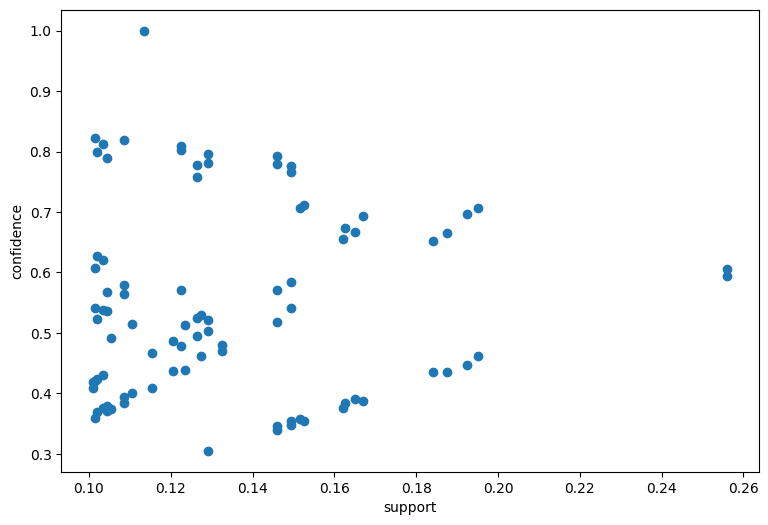

In [37]:
plt.figure(figsize=(9,6))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [38]:
matrix1 = lift1.pivot(index='antecedents',columns='consequents',values='lift')
matrix1

consequents           (YouthBks)  (ChildBks)  (CookBks)  (DoItYBks)  (RefBks)  \
antecedents                                                                     
(ChildBks)              1.576044         NaN   1.404179    1.542511  1.669725   
(YouthBks)                   NaN    1.576044   1.518667    1.654846       NaN   
(CookBks)               1.518667    1.404179        NaN    1.542677  1.649549   
(DoItYBks, GeogBks)          NaN    1.864490   1.899926         NaN       NaN   
(CookBks, GeogBks)           NaN    1.835989        NaN    1.998711       NaN   
(ChildBks, GeogBks)          NaN         NaN   1.778809    1.900346       NaN   
(CookBks, ArtBks)            NaN    1.790745        NaN    2.155264       NaN   
(ChildBks, ArtBks)           NaN         NaN   1.806175         NaN       NaN   
(CookBks, RefBks)            NaN    1.899004        NaN         NaN       NaN   
(ChildBks, RefBks)           NaN         NaN   1.876058         NaN       NaN   
(CookBks, DoItYBks)          NaN    1.840820        NaN         NaN       NaN   
(CookBks, YouthBks)          NaN    1.882497        NaN         NaN       NaN   
(ArtBks, GeogBks)            NaN    1.891253   1.883445         NaN       NaN   
(ChildBks, CookBks)     2.035985         NaN        NaN    2.022385  2.230842   
(ChildBks, YouthBks)         NaN         NaN   1.813963         NaN       NaN   
(ItalCook)                   NaN         NaN   2.320186         NaN       NaN   
(GeogBks)               1.764017    1.670264   1.618245    1.702385  1.866491   
(ArtBks)                1.693281    1.594028   1.607763    1.817192       NaN   
(RefBks)                     NaN    1.669725   1.649549    1.744119       NaN   
(DoItYBks)              1.654846    1.542511   1.542677         NaN  1.744119   
(ChildBks, DoItYBks)         NaN         NaN   1.841017         NaN       NaN   
(ArtBks, DoItYBks)           NaN         NaN   1.906873         NaN       NaN   

consequents           (ArtBks)  (GeogBks)  (CookBks, YouthBks)  \
antecedents                                                      
(ChildBks)            1.594028   1.670264             1.882497   
(YouthBks)            1.693281   1.764017                  NaN   
(CookBks)             1.607763   1.618245                  NaN   
(DoItYBks, GeogBks)        NaN        NaN                  NaN   
(CookBks, GeogBks)    2.230964        NaN                  NaN   
(ChildBks, GeogBks)   2.170444        NaN                  NaN   
(CookBks, ArtBks)          NaN   2.245509                  NaN   
(ChildBks, ArtBks)         NaN   2.274247                  NaN   
(CookBks, RefBks)          NaN        NaN                  NaN   
(ChildBks, RefBks)         NaN        NaN                  NaN   
(CookBks, DoItYBks)   2.246196   2.096618                  NaN   
(CookBks, YouthBks)        NaN        NaN                  NaN   
(ArtBks, GeogBks)          NaN        NaN                  NaN   
(ChildBks, CookBks)   2.050376   2.115885                  NaN   
(ChildBks, YouthBks)       NaN        NaN                  NaN   
(ItalCook)                 NaN        NaN                  NaN   
(GeogBks)             1.916832        NaN                  NaN   
(ArtBks)                   NaN   1.916832                  NaN   
(RefBks)                   NaN   1.866491                  NaN   
(DoItYBks)            1.817192   1.702385                  NaN   
(ChildBks, DoItYBks)       NaN   2.057735                  NaN   
(ArtBks, DoItYBks)         NaN        NaN                  NaN   

consequents           (ChildBks, CookBks)  (CookBks, DoItYBks)  \
antecedents                                                      
(ChildBks)                            NaN             1.840820   
(YouthBks)                       2.035985                  NaN   
(CookBks)                             NaN                  NaN   
(DoItYBks, GeogBks)                   NaN                  NaN   
(CookBks, GeogBks)                    NaN                  NaN   
(ChildBk

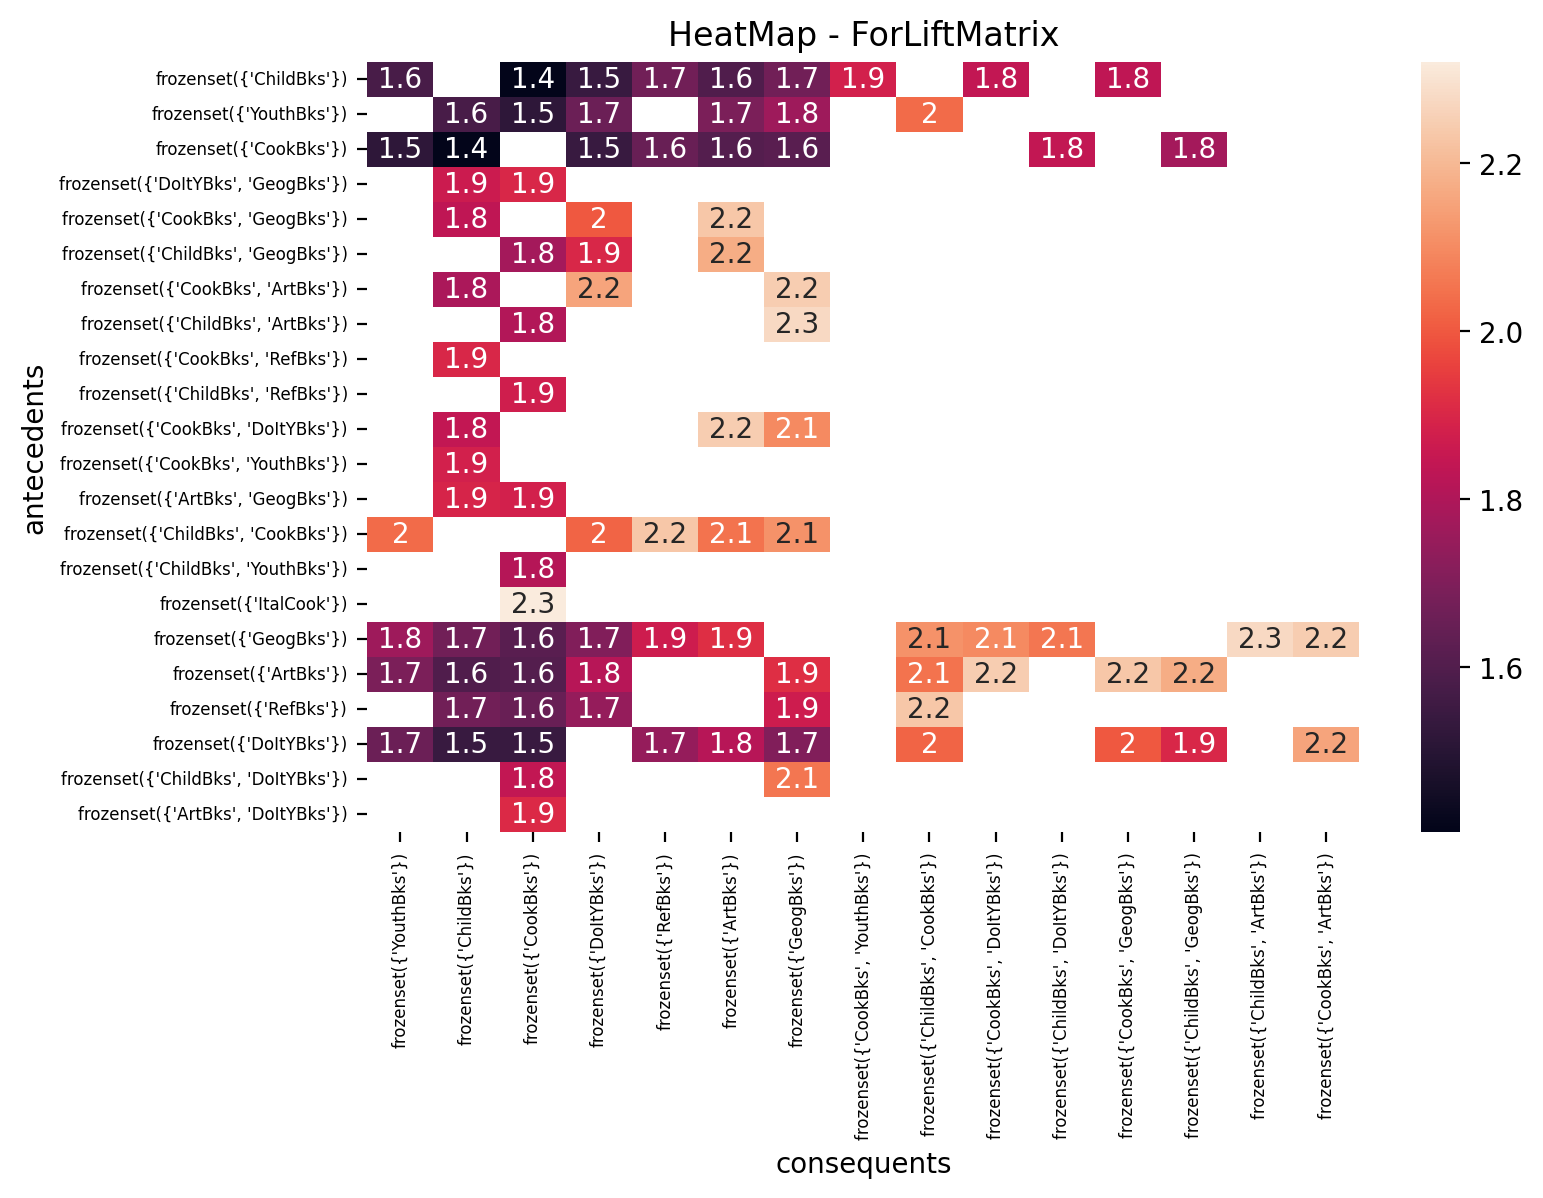

In [39]:
plt.figure(figsize=(8,5), dpi= 200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

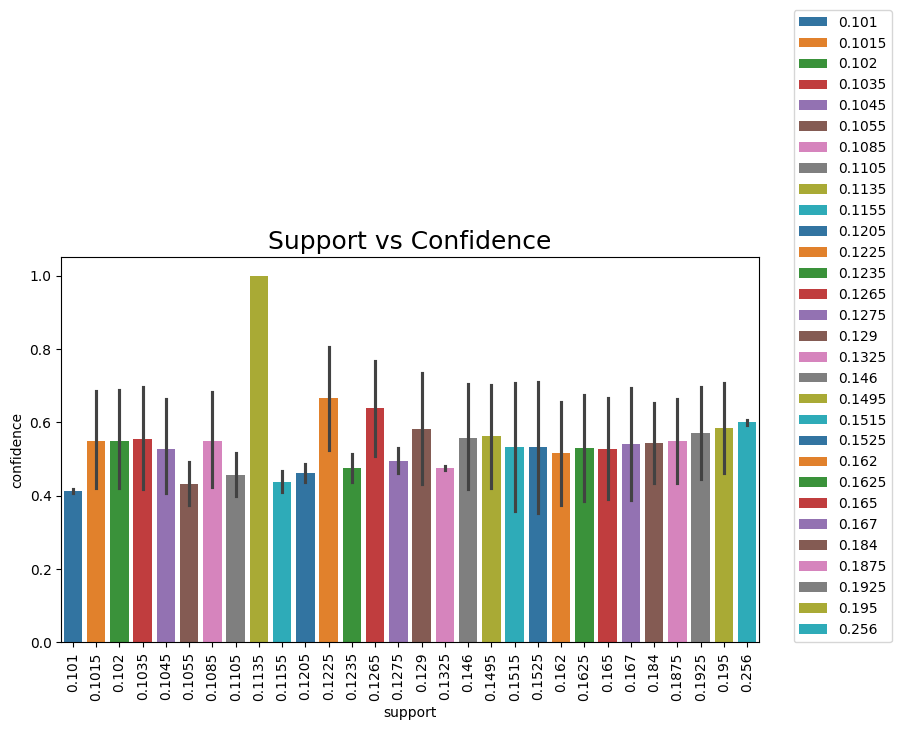

In [40]:
plt.figure(figsize=(9,5), dpi= 100)
sns.barplot(x="support",y="confidence", data=lift1, hue='support',palette='tab10')
plt.title("Support vs Confidence", fontsize= 18)
plt.xticks(rotation=90)
plt.legend(loc=(1.05,0.0))
plt.show()

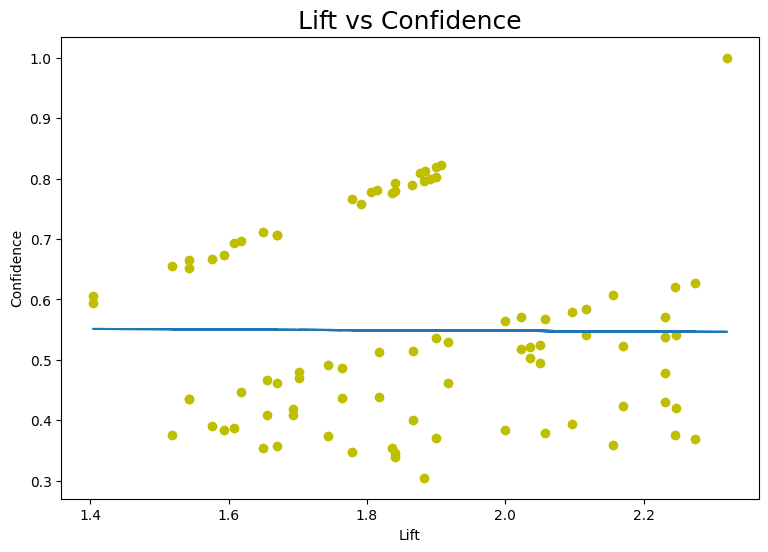

In [41]:
plt.figure(figsize=(9,6))
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
fit_fn(rules1['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

### Association rules with 15% Support and 40% confidence

### With 15% Support

In [42]:
frequent_itemsets2 = apriori(book_data,min_support= 0.15, use_colnames= True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support              itemsets  length
0    0.4230            (ChildBks)       1
1    0.2475            (YouthBks)       1
2    0.4310             (CookBks)       1
3    0.2820            (DoItYBks)       1
4    0.2145              (RefBks)       1
5    0.2410              (ArtBks)       1
6    0.2760             (GeogBks)       1
7    0.1650  (ChildBks, YouthBks)       2
8    0.2560   (ChildBks, CookBks)       2
9    0.1840  (ChildBks, DoItYBks)       2
10   0.1515    (ChildBks, RefBks)       2
11   0.1625    (ChildBks, ArtBks)       2
12   0.1950   (ChildBks, GeogBks)       2
13   0.1620   (CookBks, YouthBks)       2
14   0.1875   (CookBks, DoItYBks)       2
15   0.1525     (CookBks, RefBks)       2
16   0.1670     (CookBks, ArtBks)       2
17   0.1925    (CookBks, GeogBks)       2

### Support value gives us these information:

- 42 percent of 100 purchases are ChildBks
- 24 percent of 100 purchases are YouthBks
- 43 percent of 100 purchases are CookBks
- 28 percent of 100 purchases are DoltYBks
- 21 percent of 100 purchases are RefBks

### With 40% Confidence

In [43]:
rules2 = association_rules(frequent_itemsets2,metric= 'confidence', min_threshold= 0.4)
rules2

antecedents consequents  antecedent support  consequent support  support  \
0   (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
1   (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
2    (CookBks)  (ChildBks)              0.4310               0.423   0.2560   
3   (ChildBks)  (DoItYBks)              0.4230               0.282   0.1840   
4   (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
5     (RefBks)  (ChildBks)              0.2145               0.423   0.1515   
6     (ArtBks)  (ChildBks)              0.2410               0.423   0.1625   
7   (ChildBks)   (GeogBks)              0.4230               0.276   0.1950   
8    (GeogBks)  (ChildBks)              0.2760               0.423   0.1950   
9   (YouthBks)   (CookBks)              0.2475               0.431   0.1620   
10   (CookBks)  (DoItYBks)              0.4310               0.282   0.1875   
11  (DoItYBks)   (CookBks)              0.2820               0.431   0.1875   
12    (RefBks)   (CookBks)              0.2145               0.431   0.1525   
13    (ArtBks)   (CookBks)              0.2410               0.431   0.1670   
14   (CookBks)   (GeogBks)              0.4310               0.276   0.1925   
15   (GeogBks)   (CookBks)              0.2760               0.431   0.1925   

    confidence      lift  leverage  conviction  zhangs_metric  
0     0.666667  1.576044  0.060308    1.731000       0.485714  
1     0.605201  1.404179  0.073687    1.441240       0.498856  
2     0.593968  1.404179  0.073687    1.421069       0.505870  
3     0.434988  1.542511  0.064714    1.270770       0.609543  
4     0.652482  1.542511  0.064714    1.660347       0.489842  
5     0.706294  1.669725  0.060767    1.964548       0.510629  
6     0.674274  1.594028  0.060557    1.771427       0.490986  
7     0.460993  1.670264  0.078252    1.343211       0.695481  
8     0.706522  1.670264  0.078252    1.966074       0.554271  
9     0.654545  1.518667  0.055328    1.647105       0.453858  
10    0.435035  1.542677  0.065958    1.270875       0.618236  
11    0.664894  1.542677  0.065958    1.697968       0.489939  
12    0.710956  1.649549  0.060050    1.968556       0.501303  
13    0.692946  1.607763  0.063129    1.853095       0.498047  
14    0.446636  1.618245  0.073544    1.308361       0.671435  
15    0.697464  1.618245  0.073544    1.880766       0.527689

- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [44]:
rules2.sort_values('lift', ascending=False)

antecedents consequents  antecedent support  consequent support  support  \
7   (ChildBks)   (GeogBks)              0.4230               0.276   0.1950   
8    (GeogBks)  (ChildBks)              0.2760               0.423   0.1950   
5     (RefBks)  (ChildBks)              0.2145               0.423   0.1515   
12    (RefBks)   (CookBks)              0.2145               0.431   0.1525   
14   (CookBks)   (GeogBks)              0.4310               0.276   0.1925   
15   (GeogBks)   (CookBks)              0.2760               0.431   0.1925   
13    (ArtBks)   (CookBks)              0.2410               0.431   0.1670   
6     (ArtBks)  (ChildBks)              0.2410               0.423   0.1625   
0   (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
10   (CookBks)  (DoItYBks)              0.4310               0.282   0.1875   
11  (DoItYBks)   (CookBks)              0.2820               0.431   0.1875   
3   (ChildBks)  (DoItYBks)              0.4230               0.282   0.1840   
4   (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
9   (YouthBks)   (CookBks)              0.2475               0.431   0.1620   
1   (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
2    (CookBks)  (ChildBks)              0.4310               0.423   0.2560   

    confidence      lift  leverage  conviction  zhangs_metric  
7     0.460993  1.670264  0.078252    1.343211       0.695481  
8     0.706522  1.670264  0.078252    1.966074       0.554271  
5     0.706294  1.669725  0.060767    1.964548       0.510629  
12    0.710956  1.649549  0.060050    1.968556       0.501303  
14    0.446636  1.618245  0.073544    1.308361       0.671435  
15    0.697464  1.618245  0.073544    1.880766       0.527689  
13    0.692946  1.607763  0.063129    1.853095       0.498047  
6     0.674274  1.594028  0.060557    1.771427       0.490986  
0     0.666667  1.576044  0.060308    1.731000       0.485714  
10    0.435035  1.542677  0.065958    1.270875       0.618236  
11    0.664894  1.542677  0.065958    1.697968       0.489939  
3     0.434988  1.542511  0.064714    1.270770       0.609543  
4     0.652482  1.542511  0.064714    1.660347       0.489842  
9     0.654545  1.518667  0.055328    1.647105       0.453858  
1     0.605201  1.404179  0.073687    1.441240       0.498856  
2     0.593968  1.404179  0.073687    1.421069       0.505870

### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [45]:
lift2 = rules2[rules2.lift>1]
lift2

antecedents consequents  antecedent support  consequent support  support  \
0   (YouthBks)  (ChildBks)              0.2475               0.423   0.1650   
1   (ChildBks)   (CookBks)              0.4230               0.431   0.2560   
2    (CookBks)  (ChildBks)              0.4310               0.423   0.2560   
3   (ChildBks)  (DoItYBks)              0.4230               0.282   0.1840   
4   (DoItYBks)  (ChildBks)              0.2820               0.423   0.1840   
5     (RefBks)  (ChildBks)              0.2145               0.423   0.1515   
6     (ArtBks)  (ChildBks)              0.2410               0.423   0.1625   
7   (ChildBks)   (GeogBks)              0.4230               0.276   0.1950   
8    (GeogBks)  (ChildBks)              0.2760               0.423   0.1950   
9   (YouthBks)   (CookBks)              0.2475               0.431   0.1620   
10   (CookBks)  (DoItYBks)              0.4310               0.282   0.1875   
11  (DoItYBks)   (CookBks)              0.2820               0.431   0.1875   
12    (RefBks)   (CookBks)              0.2145               0.431   0.1525   
13    (ArtBks)   (CookBks)              0.2410               0.431   0.1670   
14   (CookBks)   (GeogBks)              0.4310               0.276   0.1925   
15   (GeogBks)   (CookBks)              0.2760               0.431   0.1925   

    confidence      lift  leverage  conviction  zhangs_metric  
0     0.666667  1.576044  0.060308    1.731000       0.485714  
1     0.605201  1.404179  0.073687    1.441240       0.498856  
2     0.593968  1.404179  0.073687    1.421069       0.505870  
3     0.434988  1.542511  0.064714    1.270770       0.609543  
4     0.652482  1.542511  0.064714    1.660347       0.489842  
5     0.706294  1.669725  0.060767    1.964548       0.510629  
6     0.674274  1.594028  0.060557    1.771427       0.490986  
7     0.460993  1.670264  0.078252    1.343211       0.695481  
8     0.706522  1.670264  0.078252    1.966074       0.554271  
9     0.654545  1.518667  0.055328    1.647105       0.453858  
10    0.435035  1.542677  0.065958    1.270875       0.618236  
11    0.664894  1.542677  0.065958    1.697968       0.489939  
12    0.710956  1.649549  0.060050    1.968556       0.501303  
13    0.692946  1.607763  0.063129    1.853095       0.498047  
14    0.446636  1.618245  0.073544    1.308361       0.671435  
15    0.697464  1.618245  0.073544    1.880766       0.527689

### Visualization of obtained rule

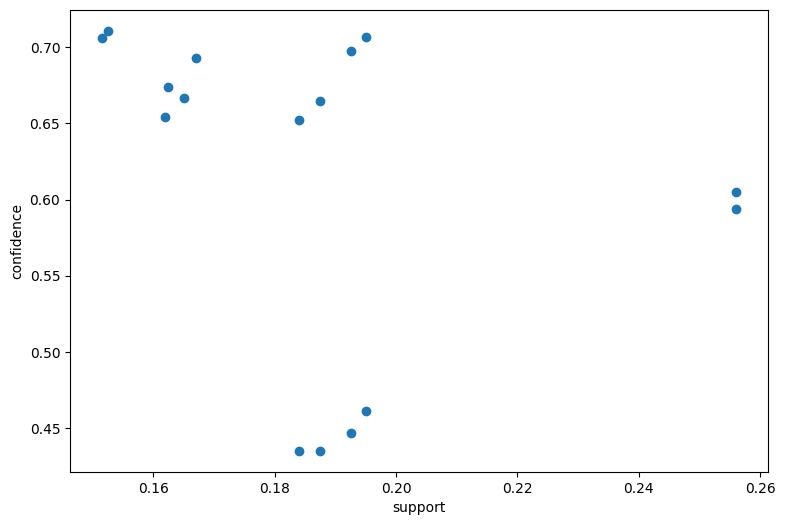

In [46]:
plt.figure(figsize=(9,6))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [47]:
matrix2 = lift2.pivot(index='antecedents',columns='consequents',values='lift')
matrix2

consequents  (ChildBks)  (CookBks)  (DoItYBks)  (GeogBks)
antecedents                                              
(YouthBks)     1.576044   1.518667         NaN        NaN
(ChildBks)          NaN   1.404179    1.542511   1.670264
(CookBks)      1.404179        NaN    1.542677   1.618245
(DoItYBks)     1.542511   1.542677         NaN        NaN
(RefBks)       1.669725   1.649549         NaN        NaN
(ArtBks)       1.594028   1.607763         NaN        NaN
(GeogBks)      1.670264   1.618245         NaN        NaN

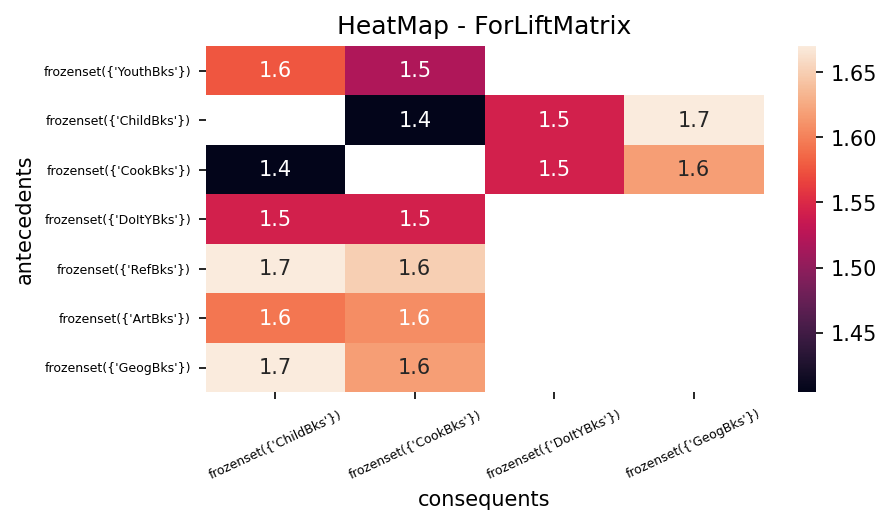

In [48]:
plt.figure(figsize=(6,3),dpi= 150)
sns.heatmap(matrix2, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=25, fontsize= 6)
plt.show()

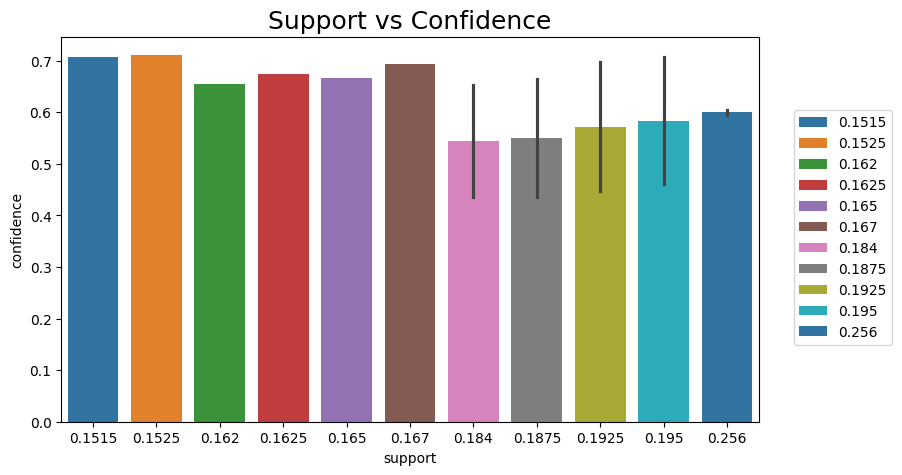

In [49]:
plt.figure(figsize=(9,5),dpi= 100)
sns.barplot(x="support",y="confidence",data=lift2,hue='support', palette='tab10')
plt.title("Support vs Confidence", fontsize= 18)
plt.legend(loc=(1.05,0.2))
plt.show()

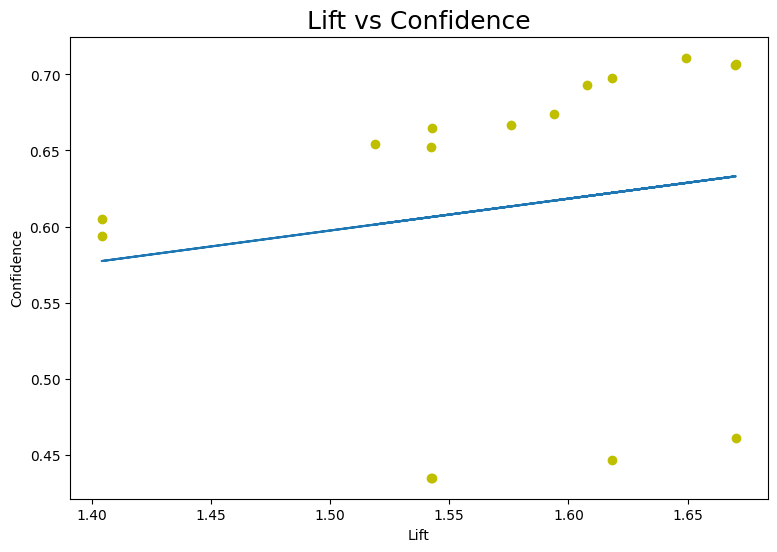

In [50]:
plt.figure(figsize=(9,6))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'], 
fit_fn(rules2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize = 18)
plt.show()

### Association rules with 20% Support and 60% confidence

### With 20% Support

In [51]:
frequent_itemsets3 = apriori(book_data, min_support= 0.2, use_colnames= True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

C:\Users\vijay\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support             itemsets  length
0   0.4230           (ChildBks)       1
1   0.2475           (YouthBks)       1
2   0.4310            (CookBks)       1
3   0.2820           (DoItYBks)       1
4   0.2145             (RefBks)       1
5   0.2410             (ArtBks)       1
6   0.2760            (GeogBks)       1
7   0.2560  (ChildBks, CookBks)       2

- 42 percent of 100 purchases are ChildBks
- 24 percent of 100 purchases are YouthBks
- 43 percent of 100 purchases are CookBks
- 28 percent of 100 purchases are DoltYBks
- 21 percent of 100 purchases are RefBks

### With 60% Confidence

In [52]:
rules3 = association_rules(frequent_itemsets3, metric= 'confidence', min_threshold= 0.6)
rules3

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.605201  1.404179  0.073687     1.44124       0.498856

- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [53]:
rules3.sort_values('lift', ascending= False)

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.605201  1.404179  0.073687     1.44124       0.498856

### Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [54]:
lift3 = rules3[rules3.lift>1]
lift3

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.605201  1.404179  0.073687     1.44124       0.498856

### Visualization of obtained rule

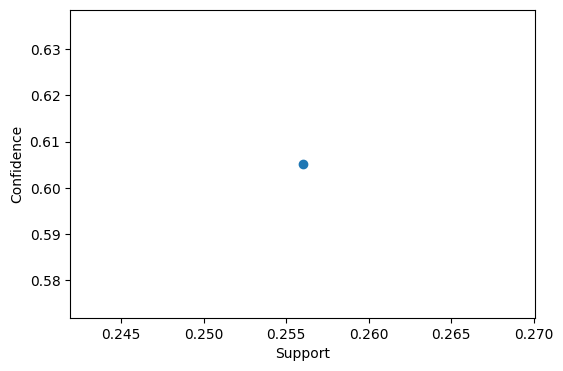

In [55]:
plt.figure(figsize=(6,4))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()

In [56]:
matrix3 = lift3.pivot(index='antecedents',columns='consequents',values='lift')
matrix3

consequents  (CookBks)
antecedents           
(ChildBks)    1.404179

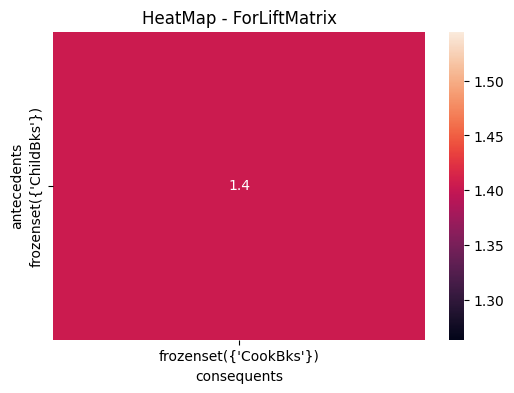

In [57]:
plt.figure(figsize=(6,4), dpi= 100)
sns.heatmap(matrix3, annot= True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation= 90)
plt.xticks(rotation= 0)
plt.show()

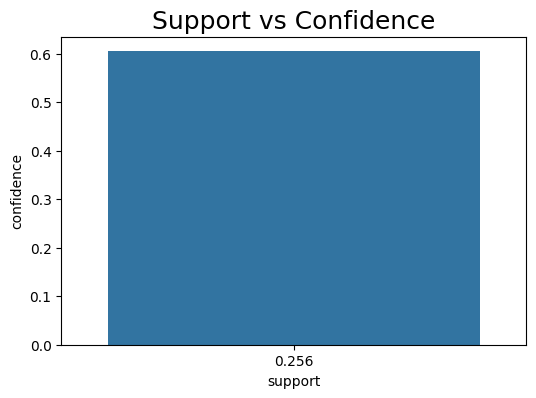

In [58]:
plt.figure(figsize=(6,4),dpi=100)
sns.barplot(x="support", y="confidence", data= lift3)
plt.title("Support vs Confidence", fontsize= 18)
plt.show()